In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

from hmatrix import *
from collections import deque

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = [10, 10]
plt.style.use('default')

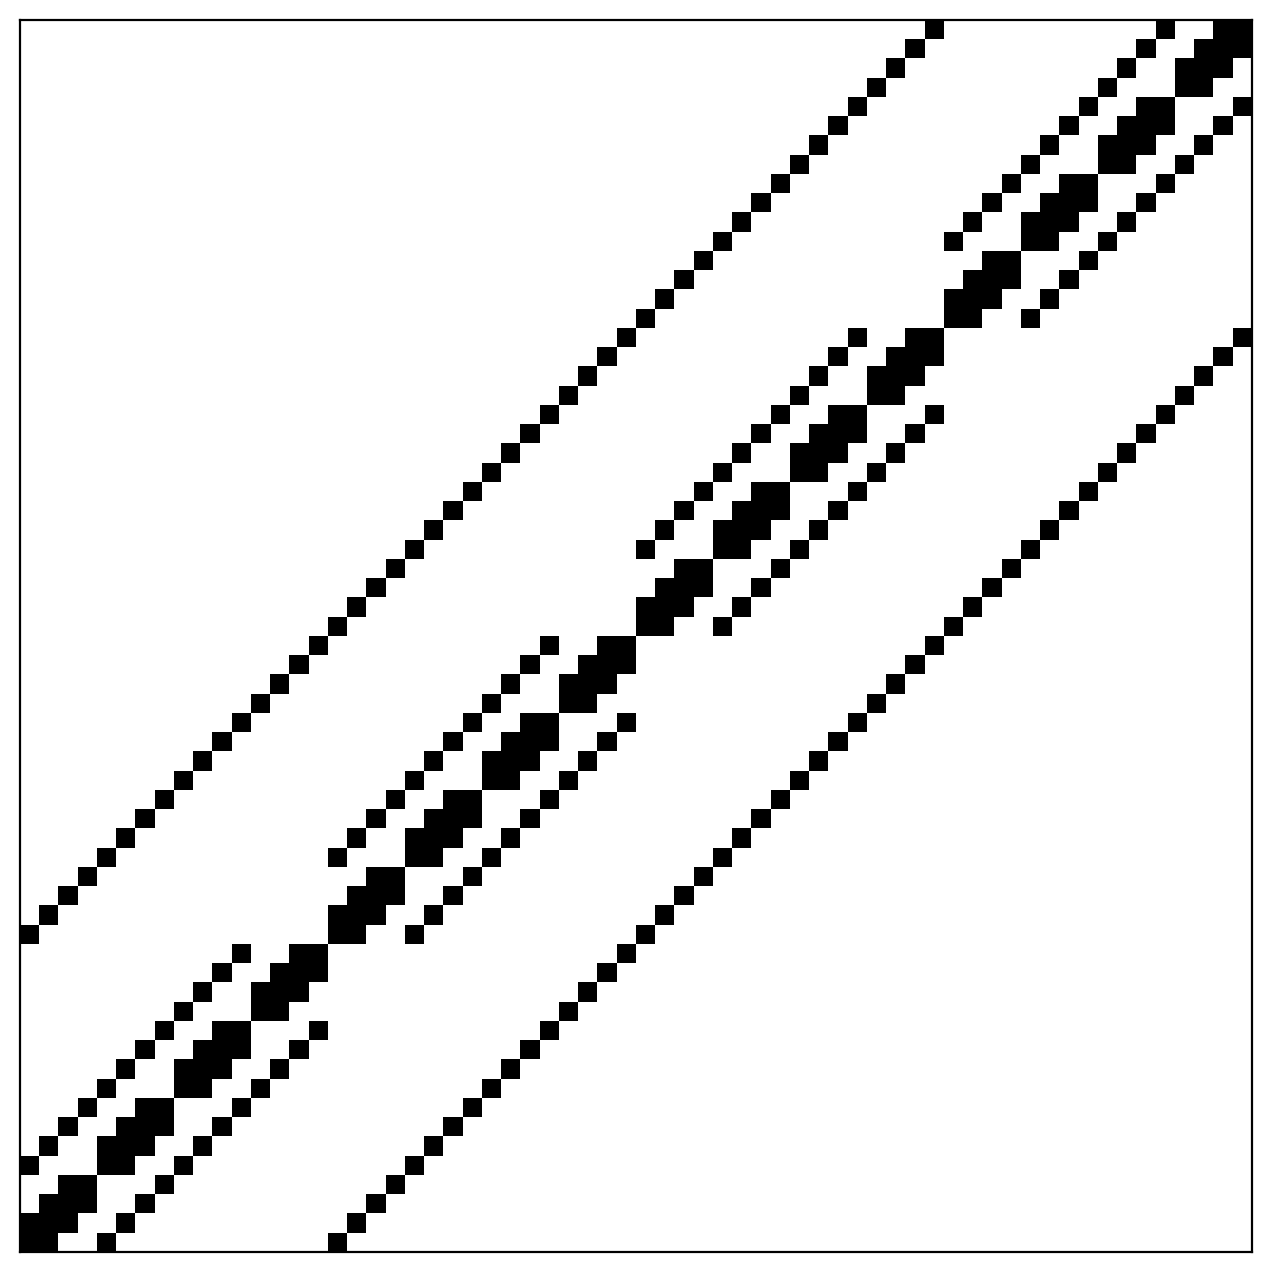

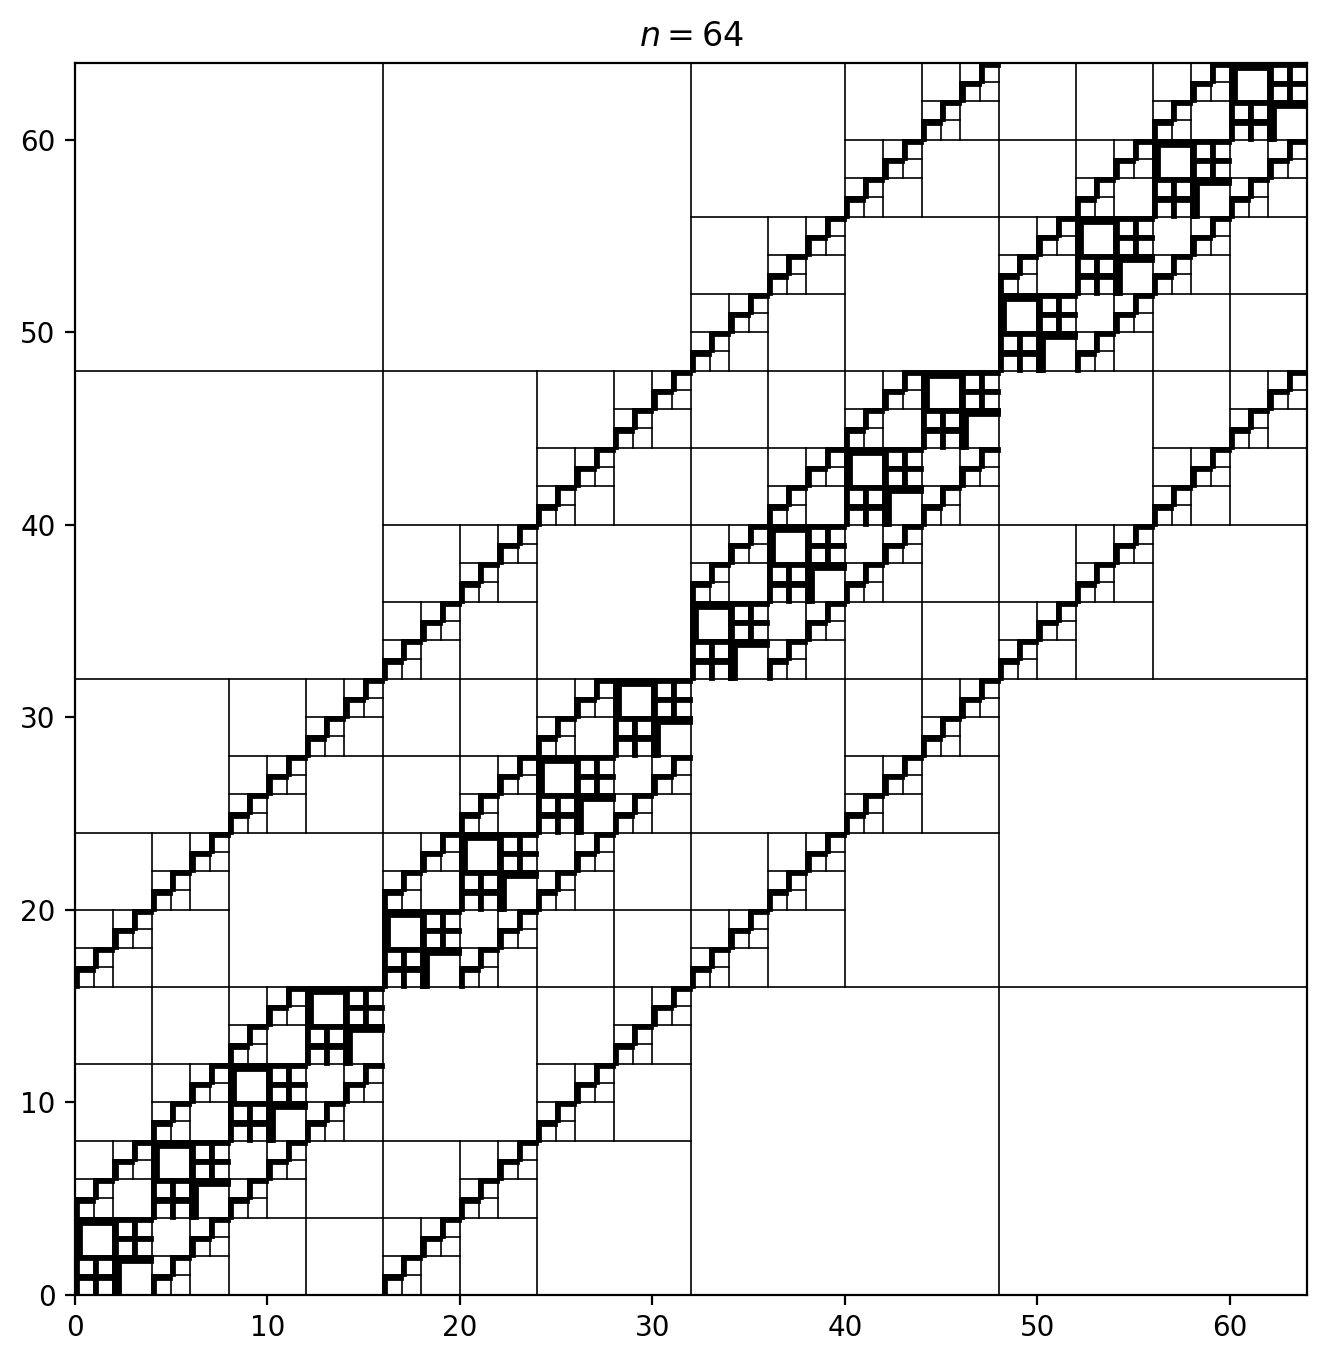

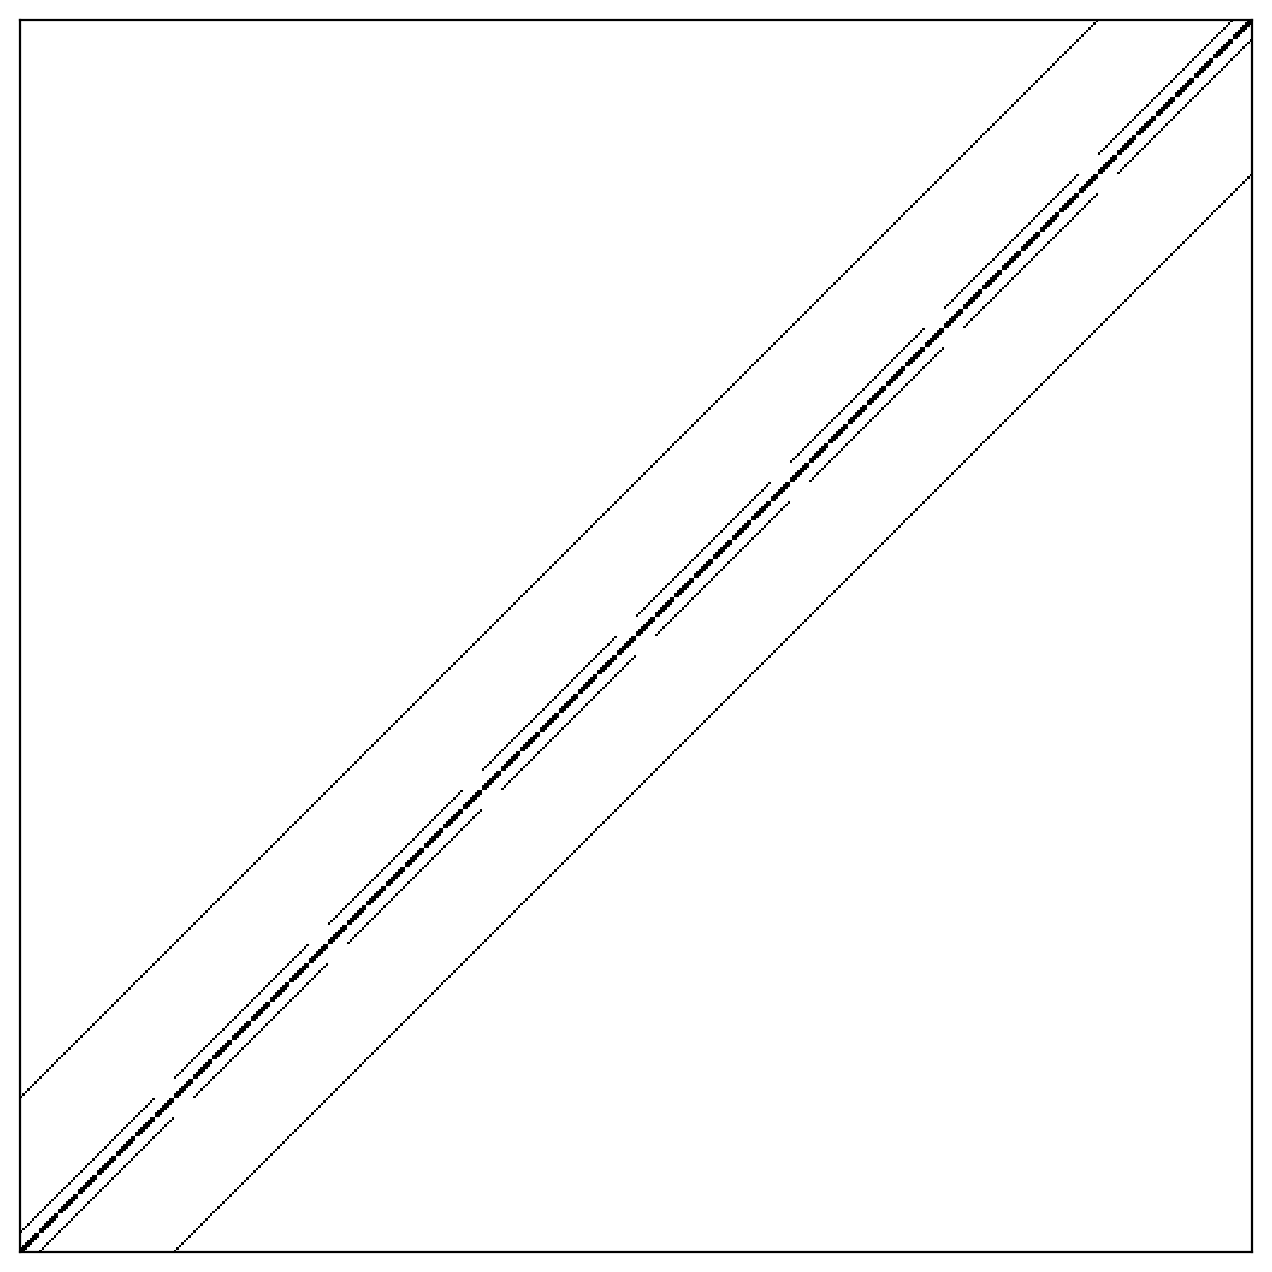

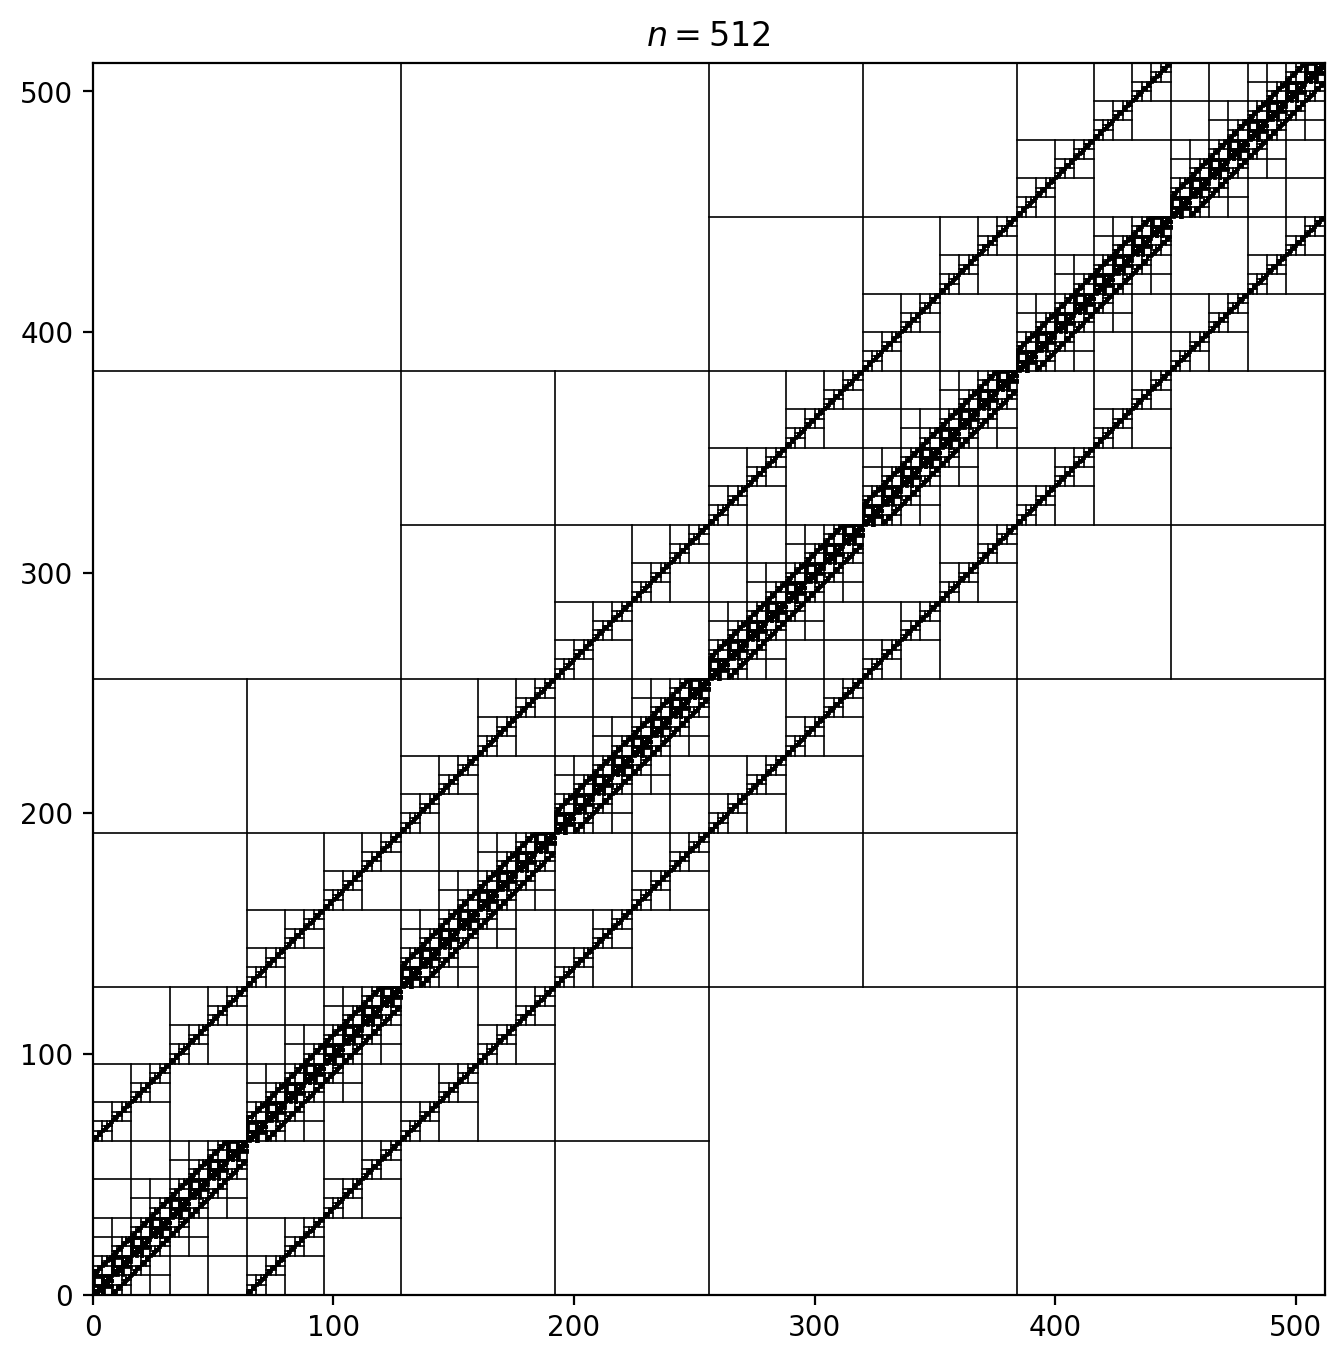

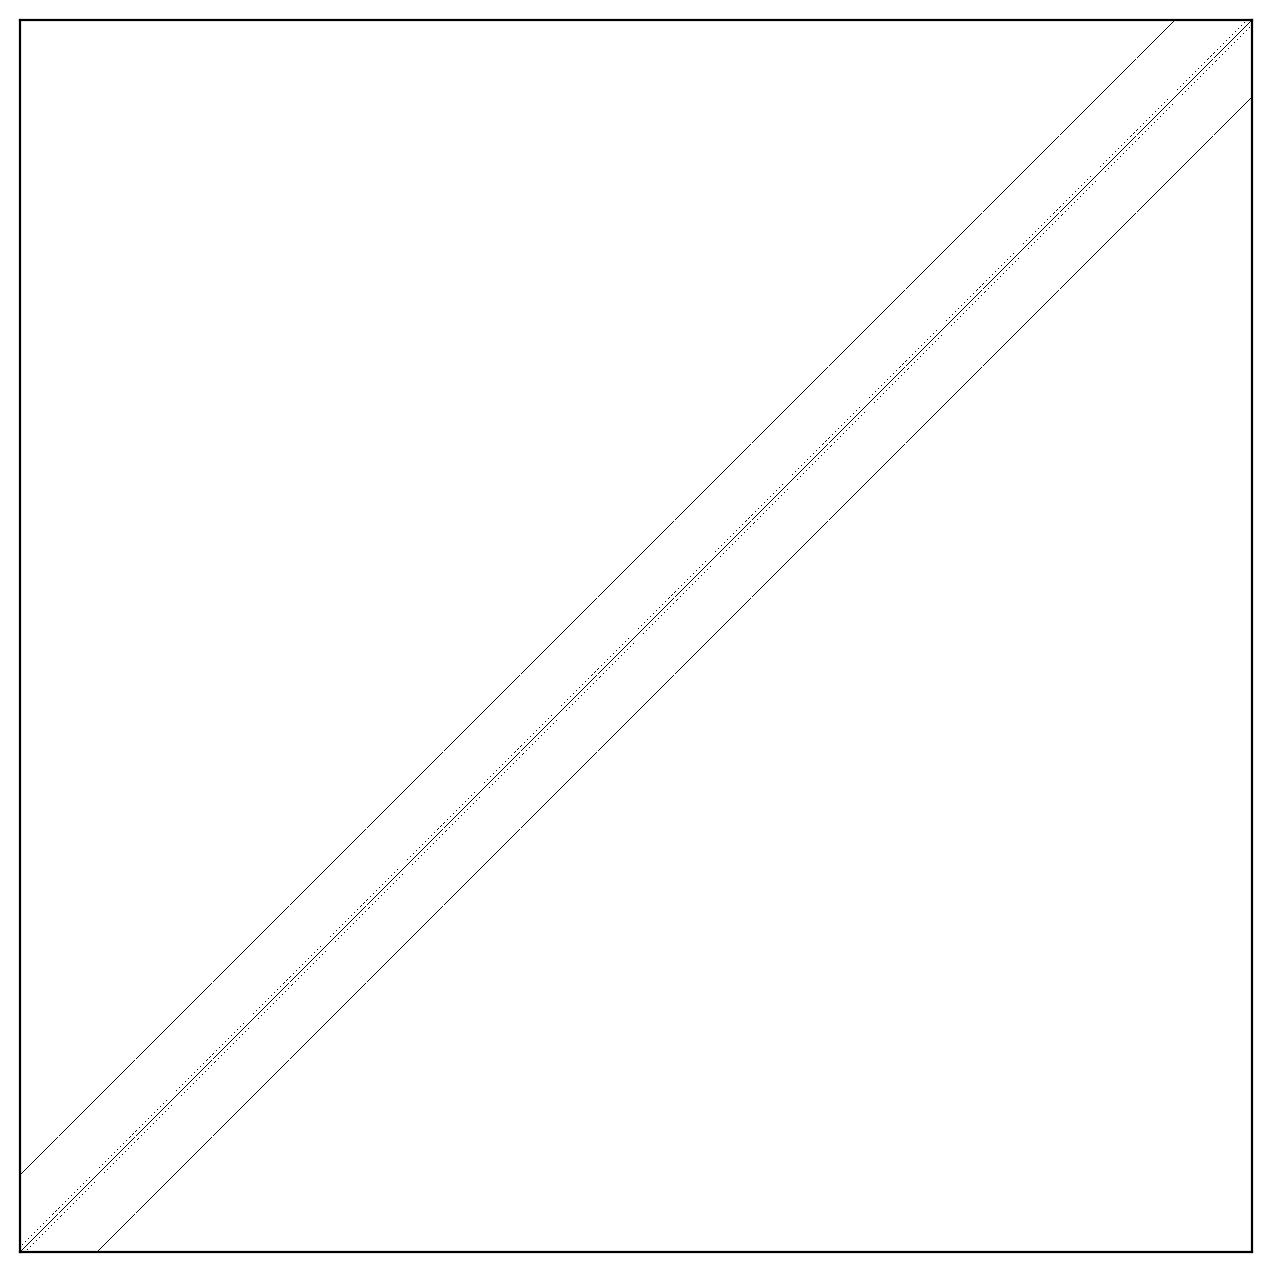

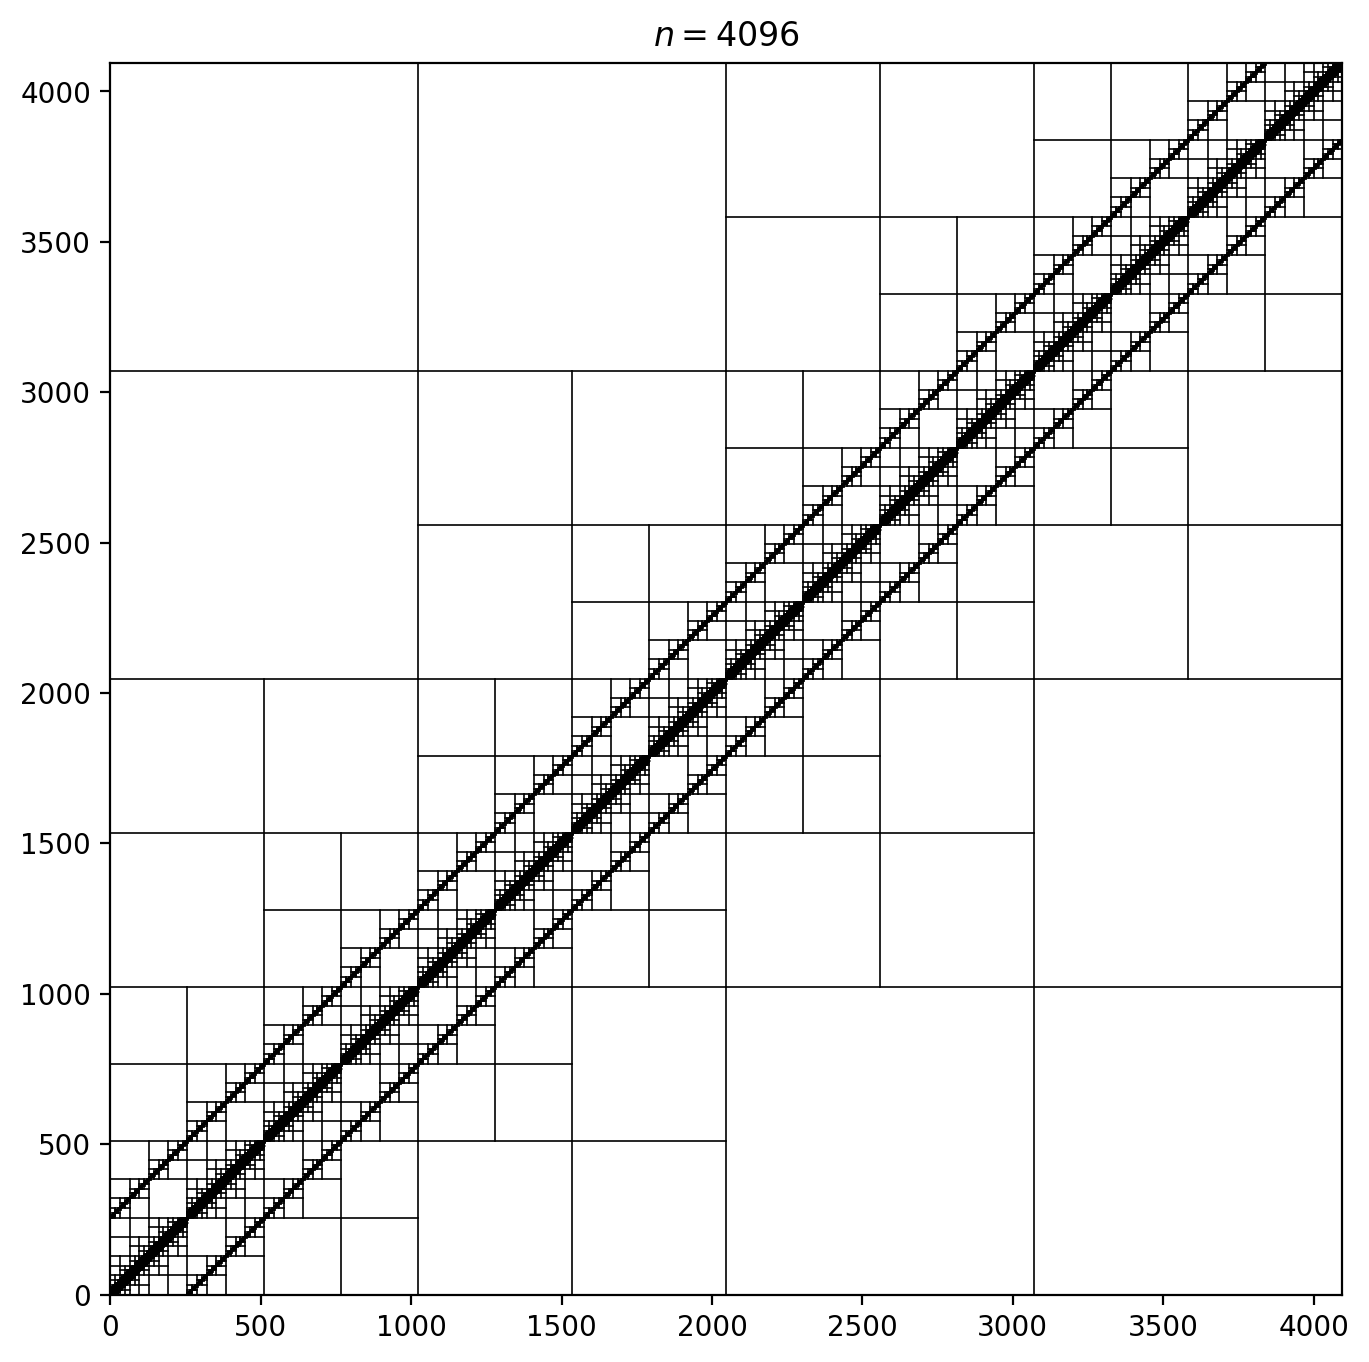

In [3]:
As = []

for w in (4, 8, 16):
    A = np.zeros((w**3, w**3))
    ind = lambda i, j, k: i + w * j + w**2 * k
    for i in range(w):
        for j in range(w):
            for k in range(w):
                A[ind(i, j, k), ind(i, j, k)] = random.random()
                if i - 1 >= 0:
                    A[ind(i, j, k), ind(i - 1, j, k)] = random.random()
                if i + 1 < w:
                    A[ind(i, j, k), ind(i + 1, j, k)] = random.random()
                if j - 1 >= 0:
                    A[ind(i, j, k), ind(i, j - 1, k)] = random.random()
                if j + 1 < w:
                    A[ind(i, j, k), ind(i, j + 1, k)] = random.random()
                if k - 1 >= 0:
                    A[ind(i, j, k), ind(i, j, k - 1)] = random.random()
                if k + 1 < w:
                    A[ind(i, j, k), ind(i, j, k + 1)] = random.random()
    As.append(A)

for i, A in enumerate(As):
    plt.figure(figsize=(8, 8))
    plt.spy(np.rot90(A))
    plt.xticks([])
    plt.yticks([])
    plt.savefig(f"{i}_bp_sp.png")
    DrawTree(CreateTree(A, r=1, eps=1e-3)).savefig(f"{i}_bp_hm.png")

In [4]:
class Graph:
    def __init__(self, A: np.ndarray):
        n = A.shape[0]
        self.adj = {u: {v for v in range(n) if A[u, v] > 0 and u != v} for u in range(n)}


def MinimumDegree(G: Graph) -> np.ndarray:
    n = len(G.adj)
    order = []

    for _ in range(n):
        p = min(G.adj, key=lambda v: len(G.adj[v]))
        order.append(p)
        for u in G.adj[p]:
            G.adj[u] |= G.adj[p]
            G.adj[u] -= {p, u}
        del G.adj[p]

    return np.array(order)


def CuthillMcKee(G: Graph) -> np.ndarray:
    queue, order, visit = deque(), [], {v: False for v in G.adj}
    p = min(G.adj, key=lambda x: len(G.adj[x]))
    order.append(p)
    visit[p] = True

    for u in sorted(G.adj[p], key=lambda x: len(G.adj[x])):
        queue.append(u)

    while len(queue) > 0:
        u = queue.popleft()

        if not visit[u]:
            order.append(u)
            visit[u] = True

            for v in sorted(G.adj[u], key=lambda x: len(G.adj[x])):
                if not visit[v]:
                    queue.append(v)

    return np.array(order)


def ReversedCuthillMcKee(G: Graph) -> np.ndarray:
    return CuthillMcKee(G)[::-1]

MINIMUM DEGREE


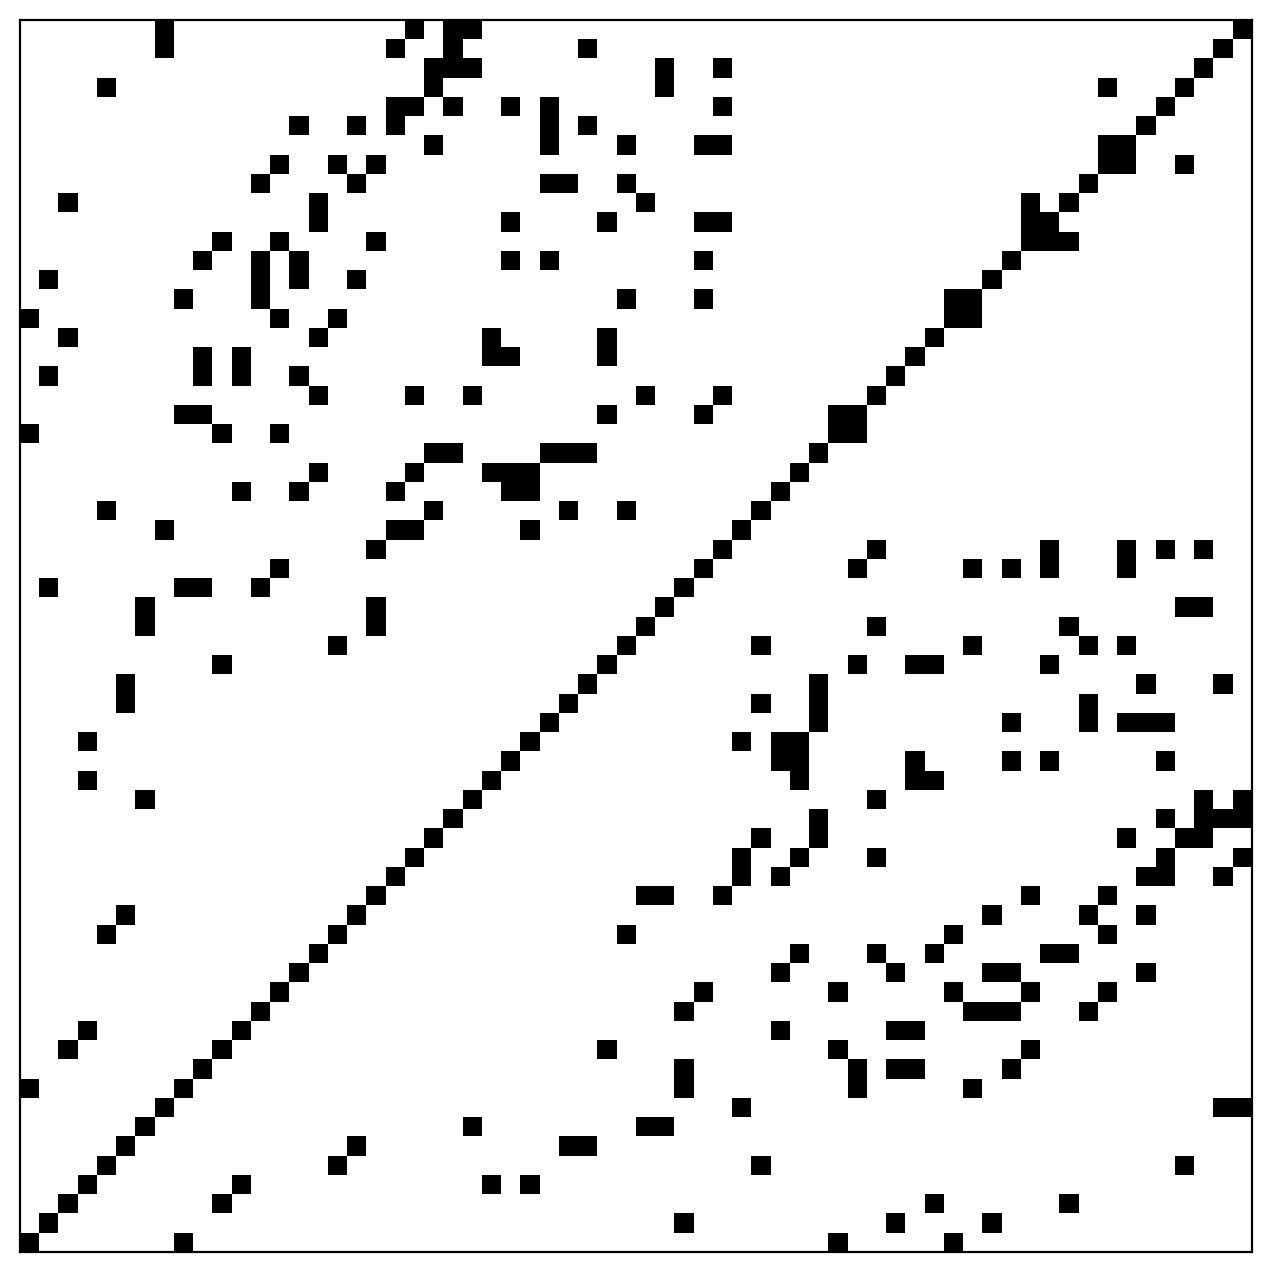

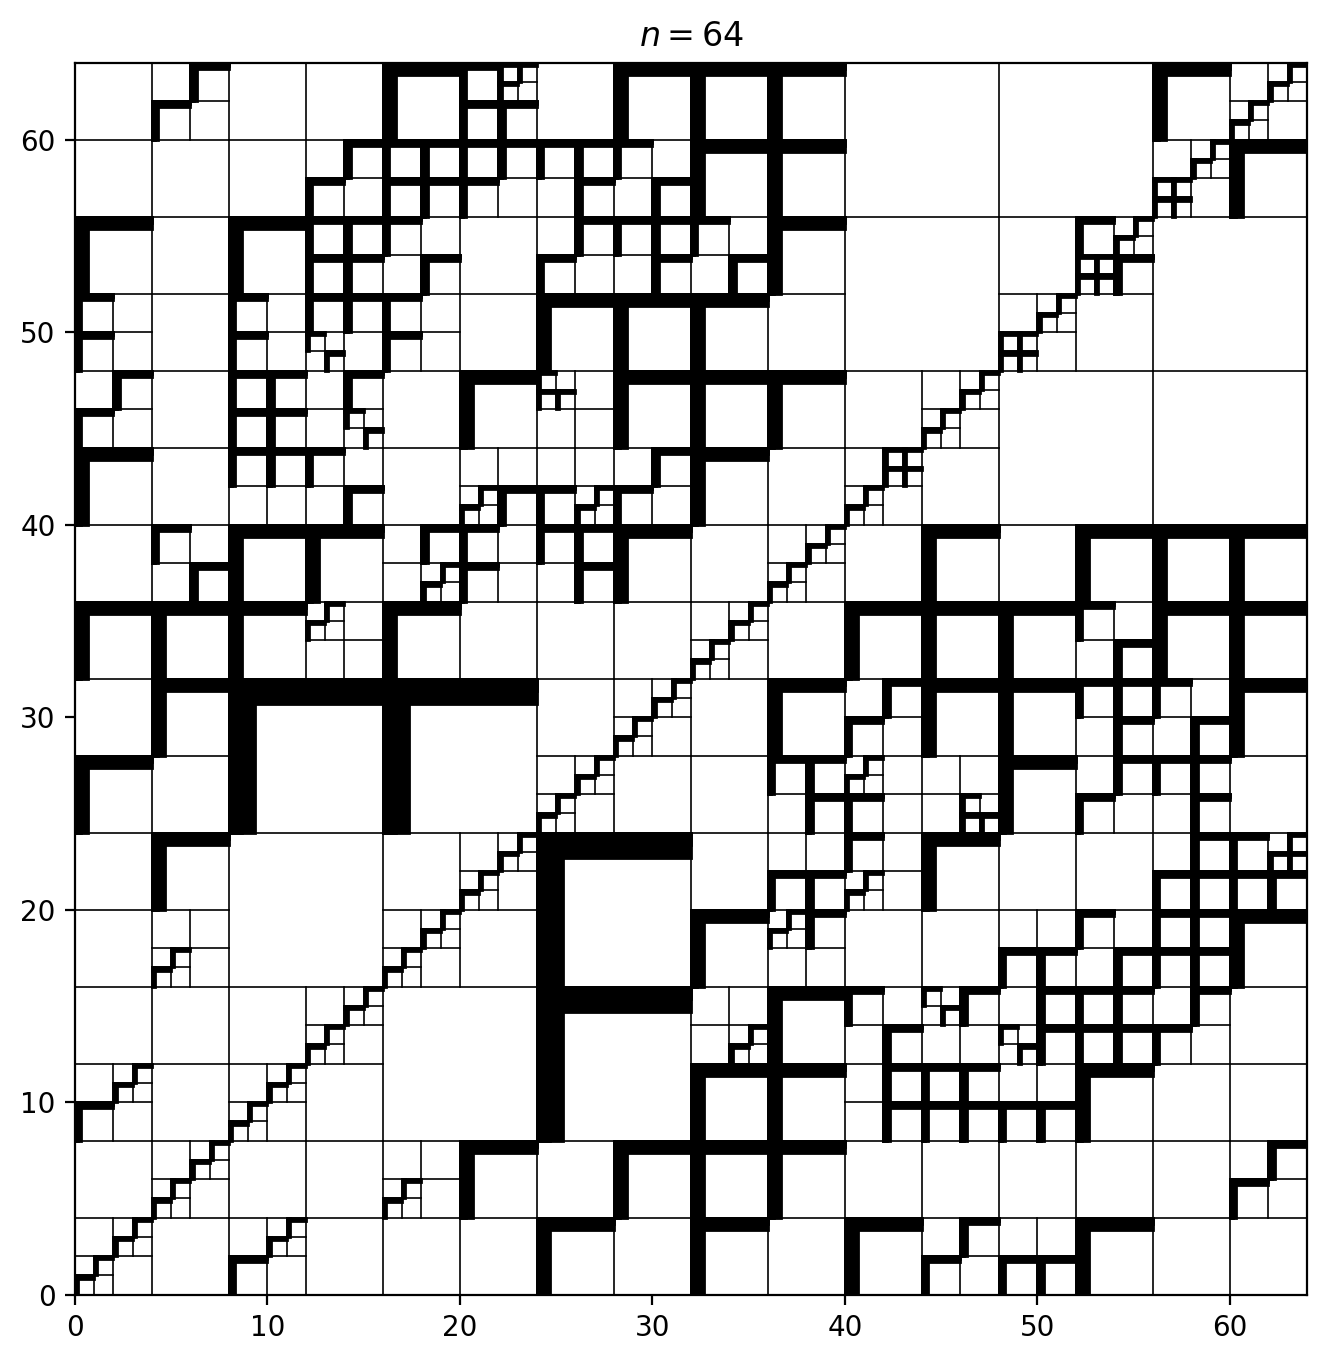

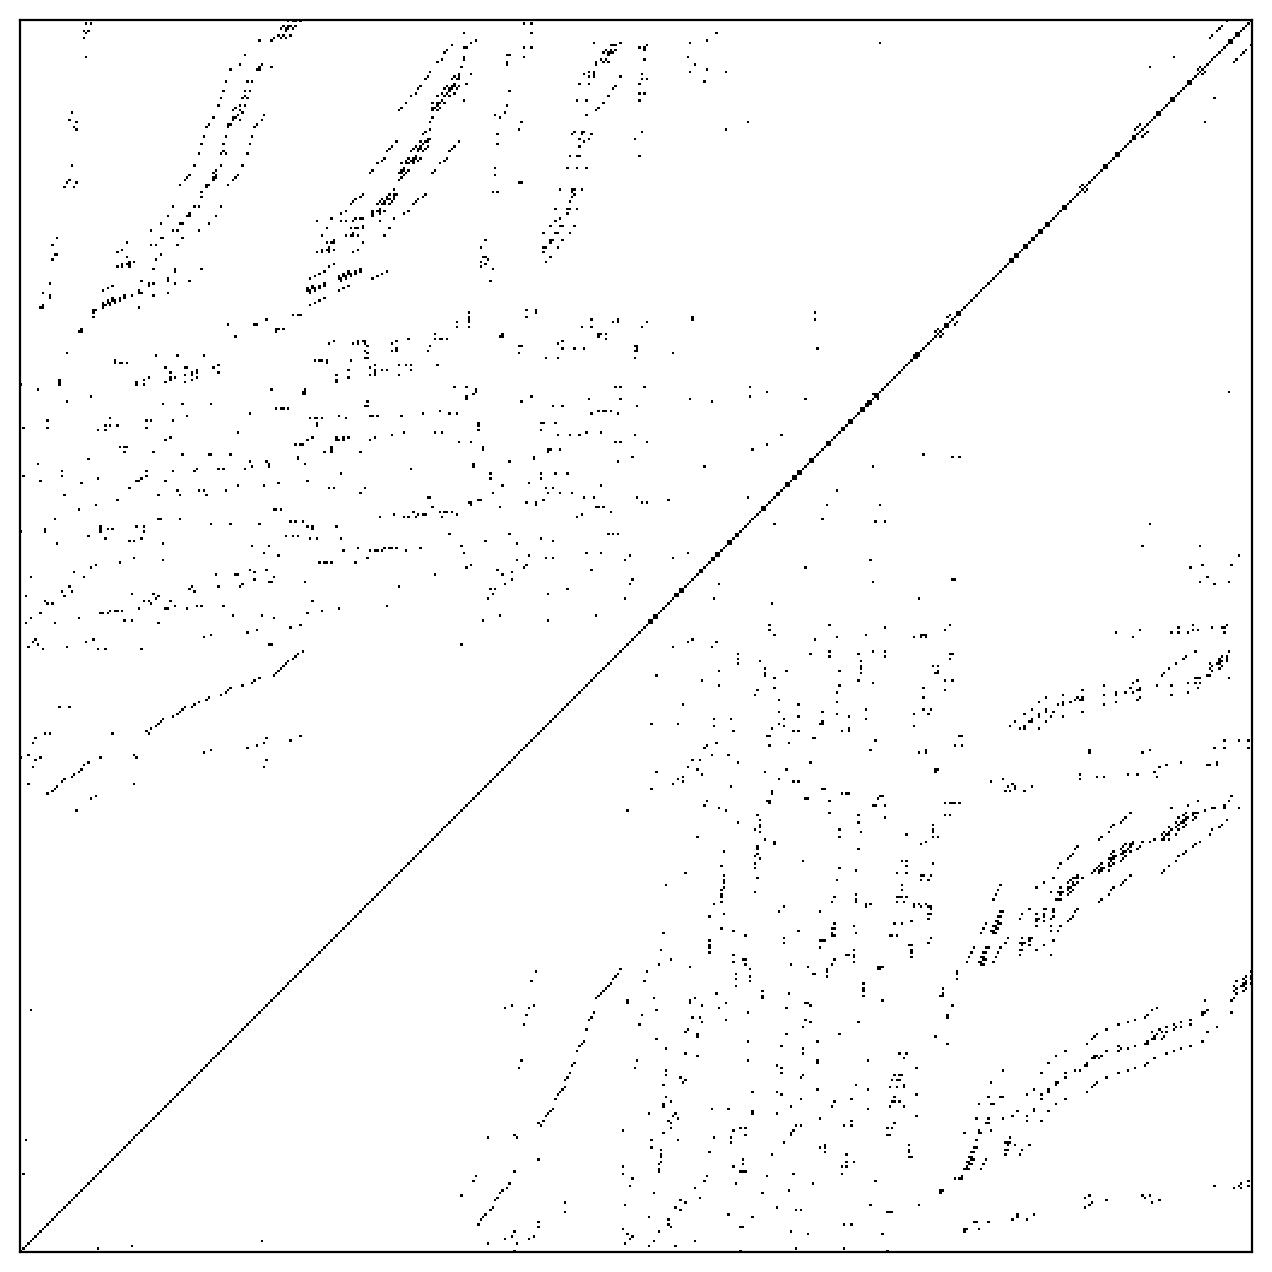

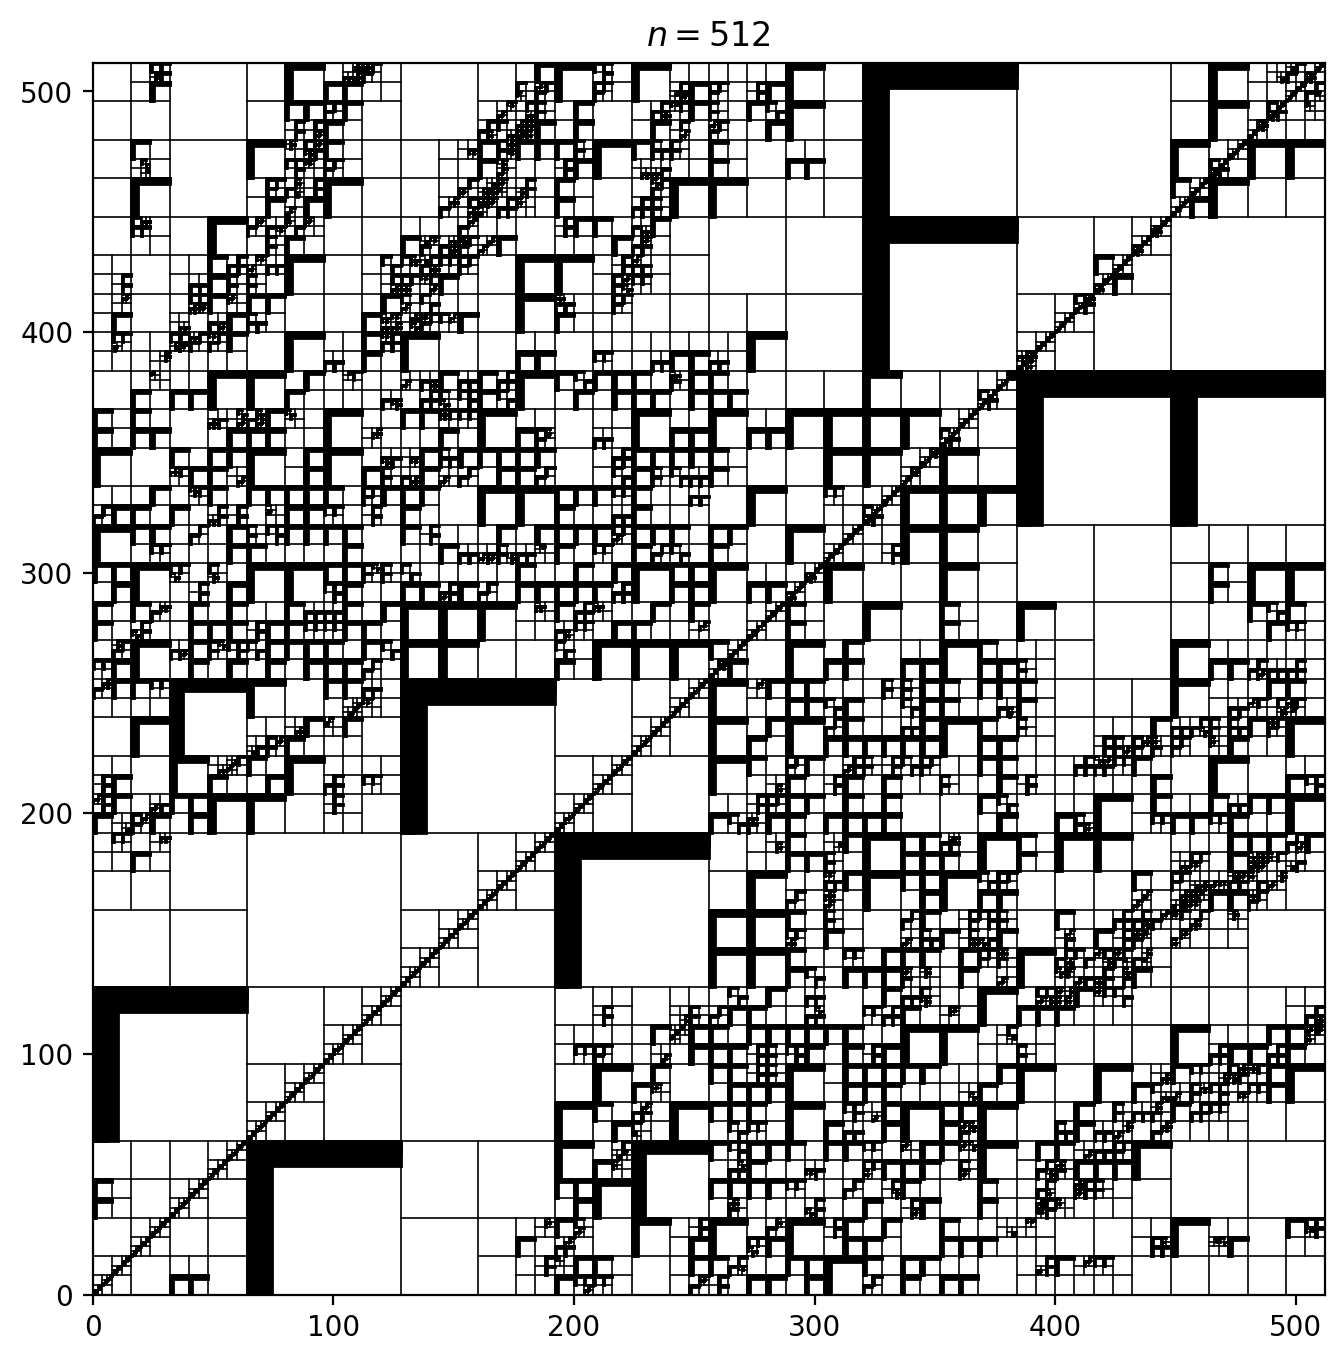

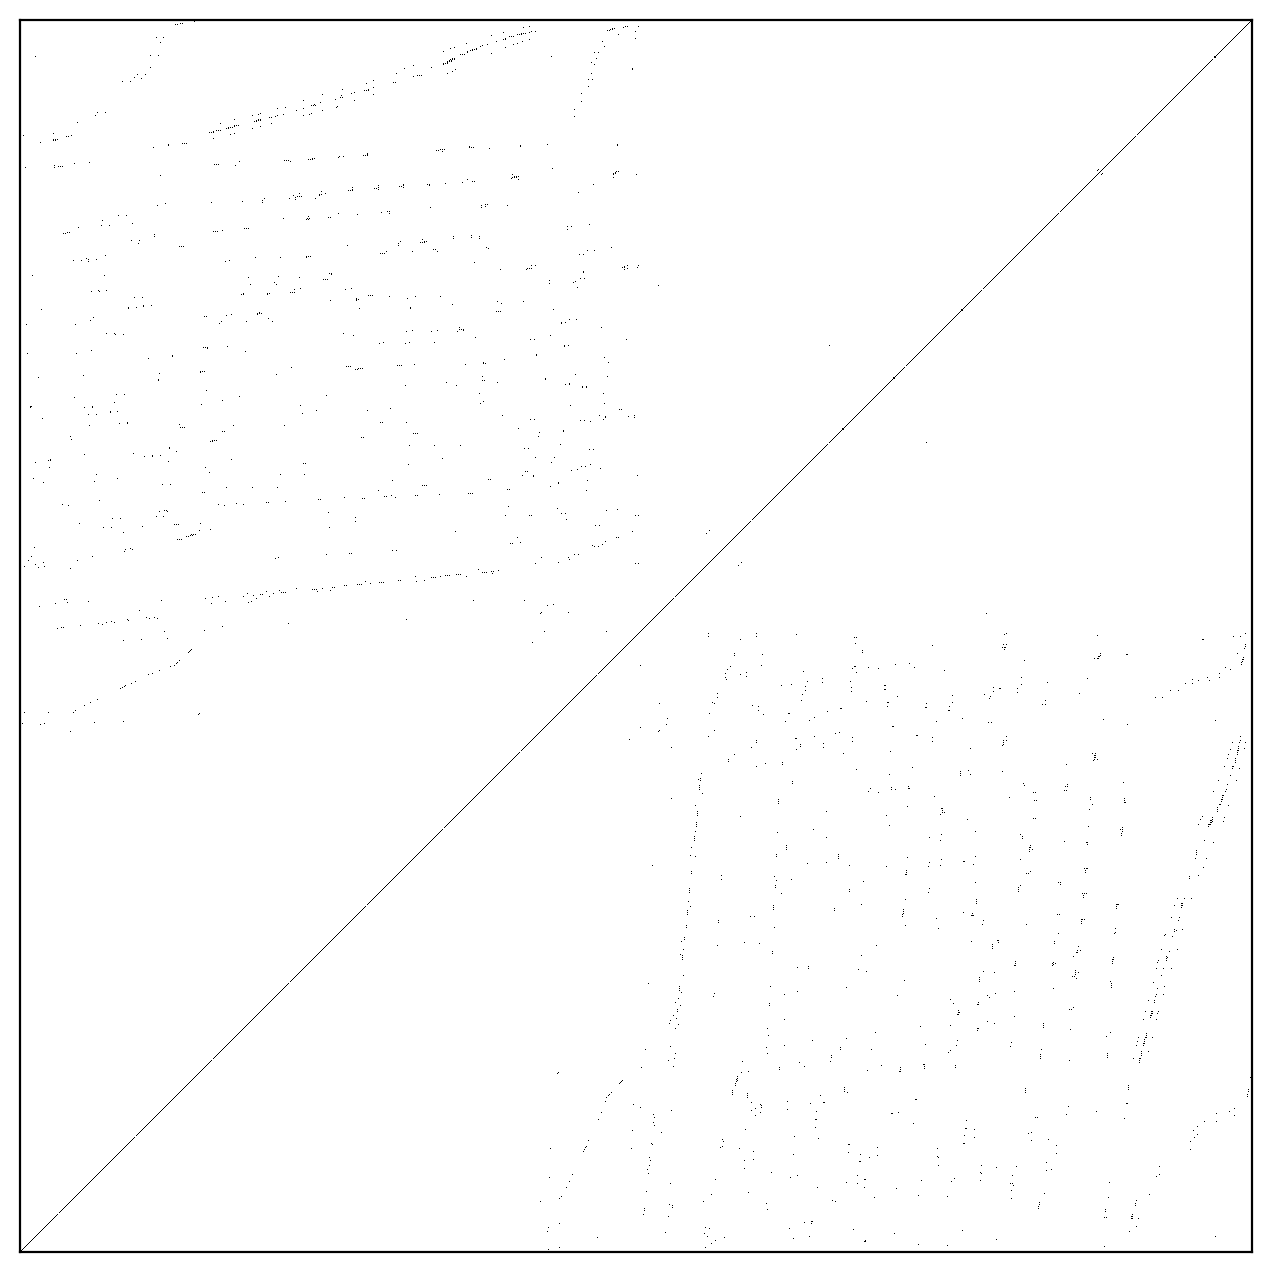

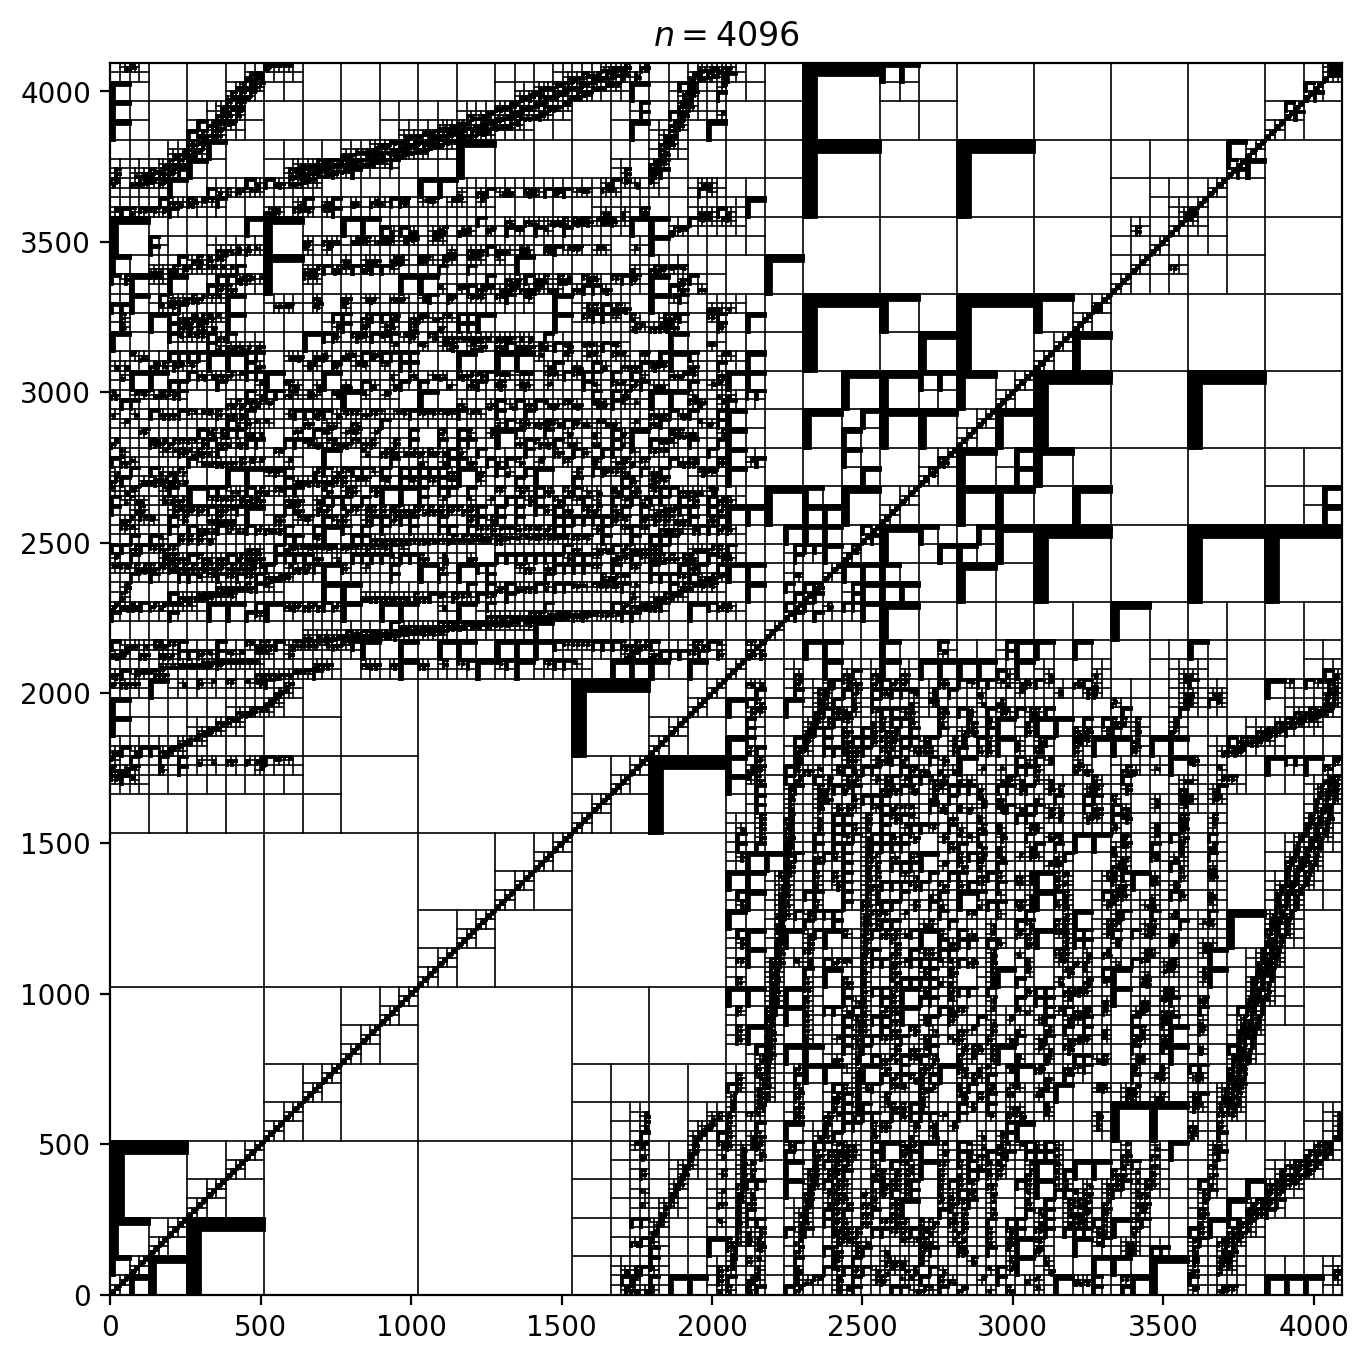

In [7]:
print("MINIMUM DEGREE")
for i,A in enumerate(As):
    order = MinimumDegree(Graph(A))
    plt.figure(figsize=(8, 8))
    plt.spy(np.rot90(A[order, :][:, order]))
    plt.xticks([])
    plt.yticks([])
    plt.savefig(f"{i}_ap_sp_mindeg.png")
    DrawTree(CreateTree(A[order, :][:, order], r=1, eps=1e-2)).savefig(f"{i}_ap_hm_mindeg.png")

CUTHILL-MCKEE


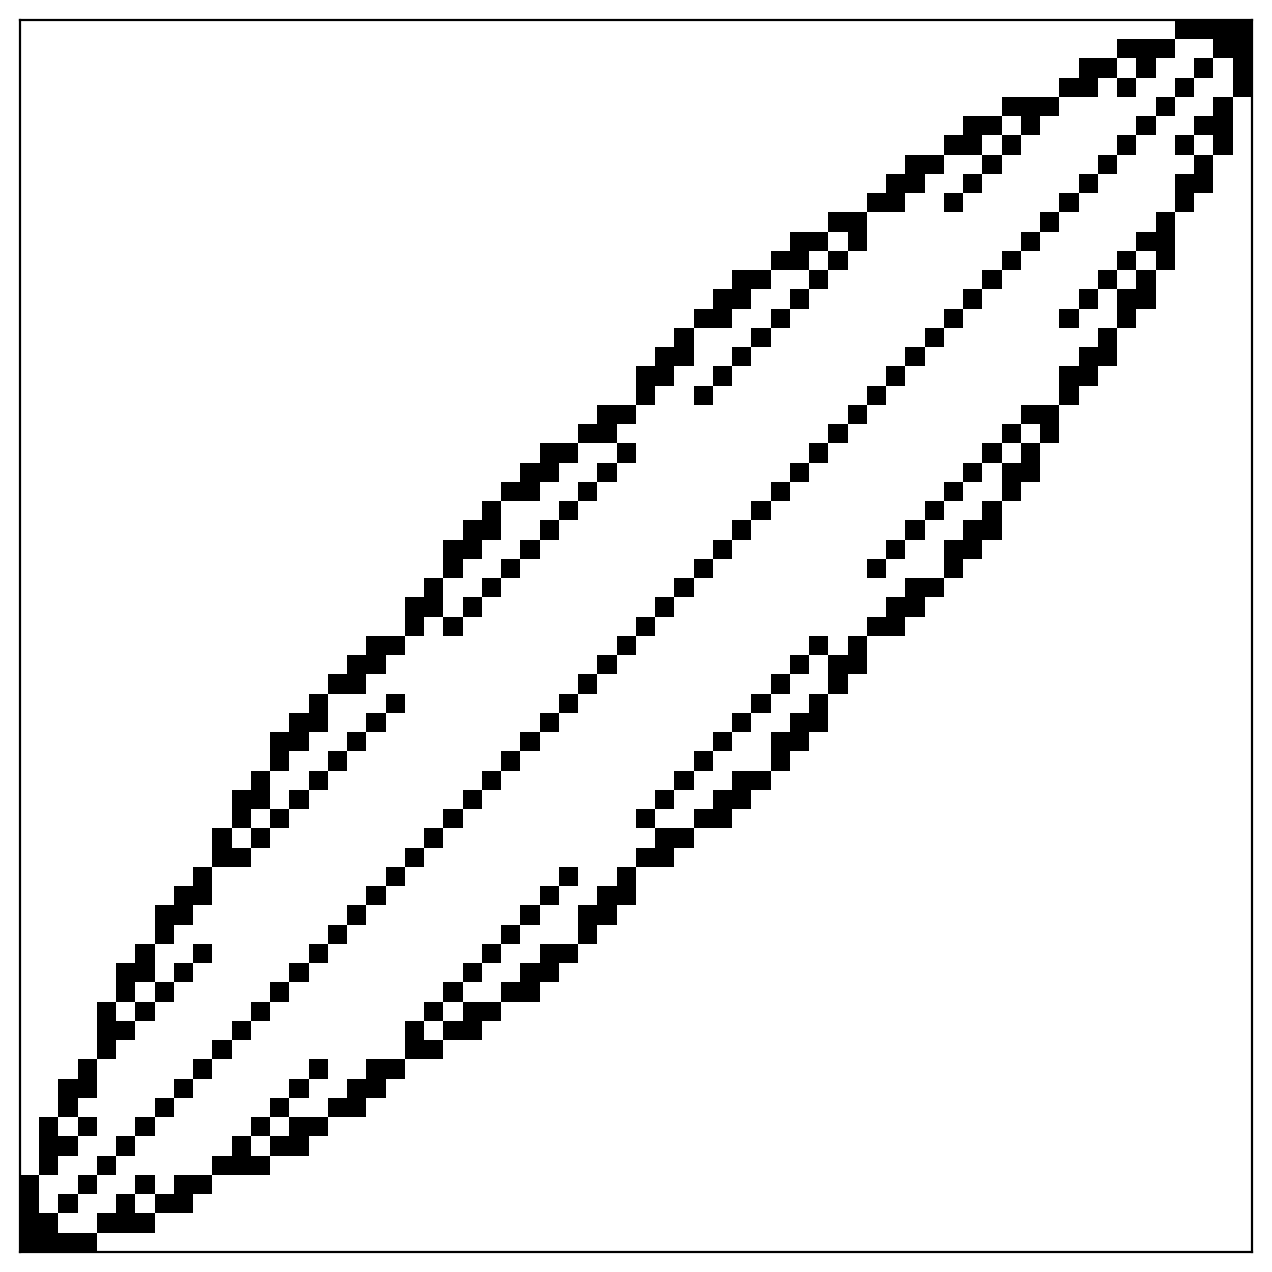

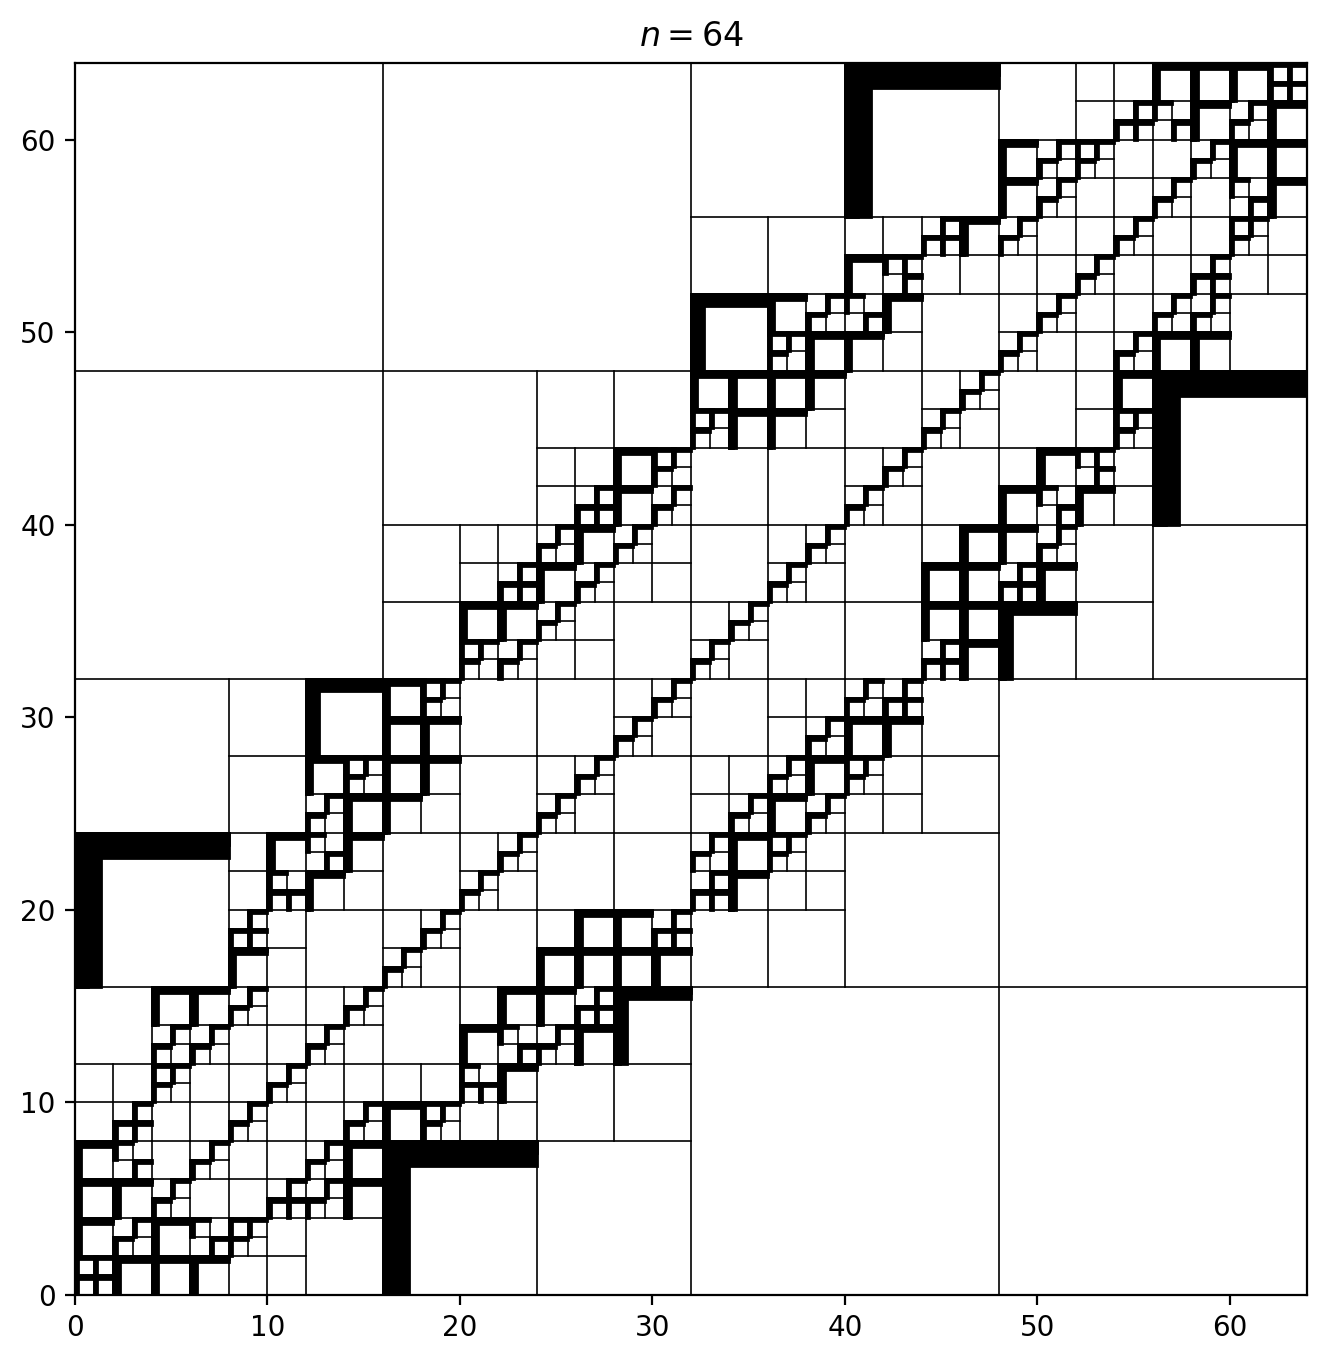

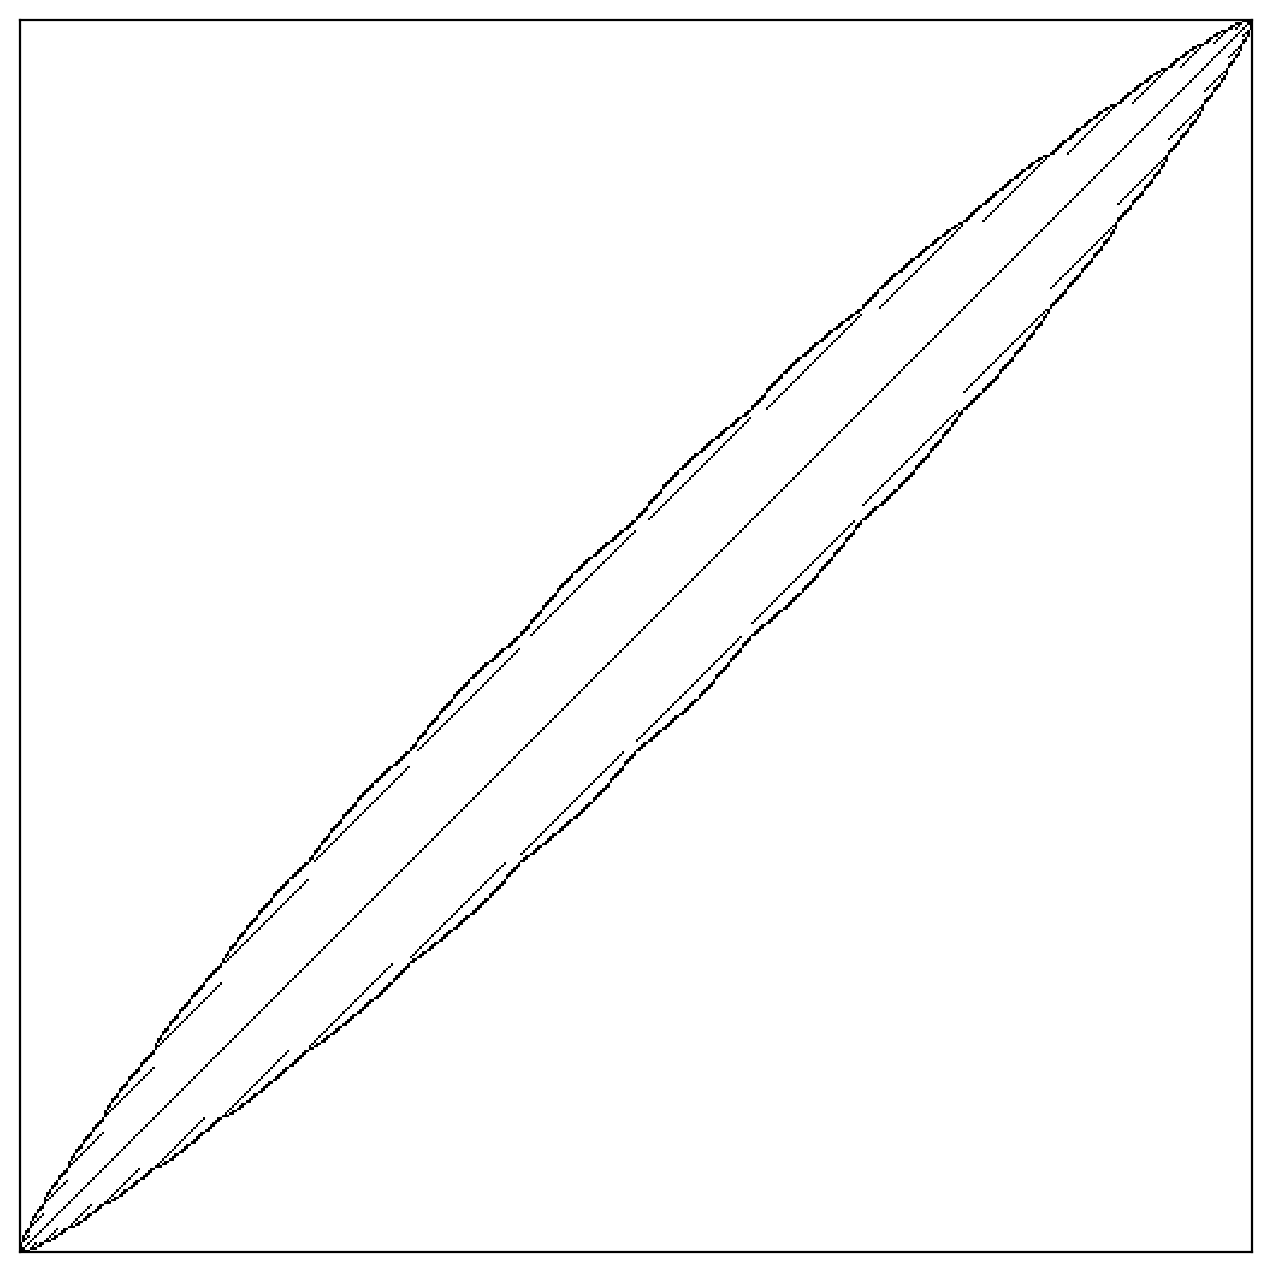

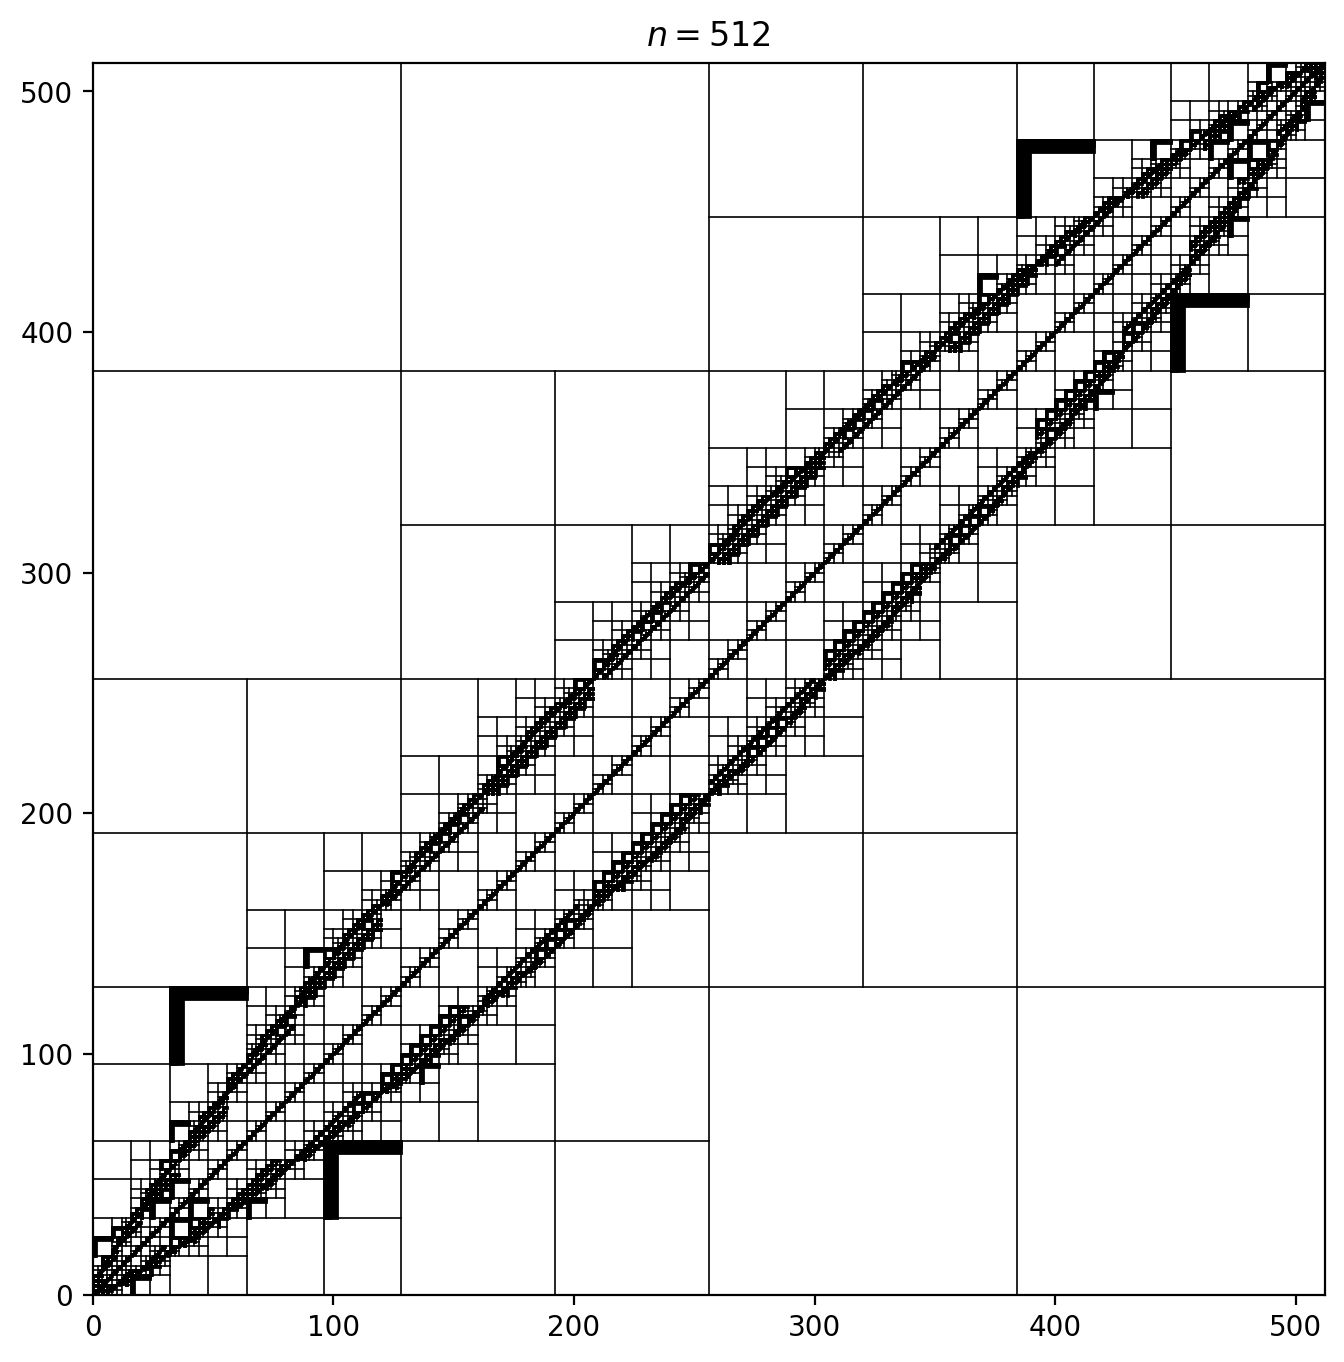

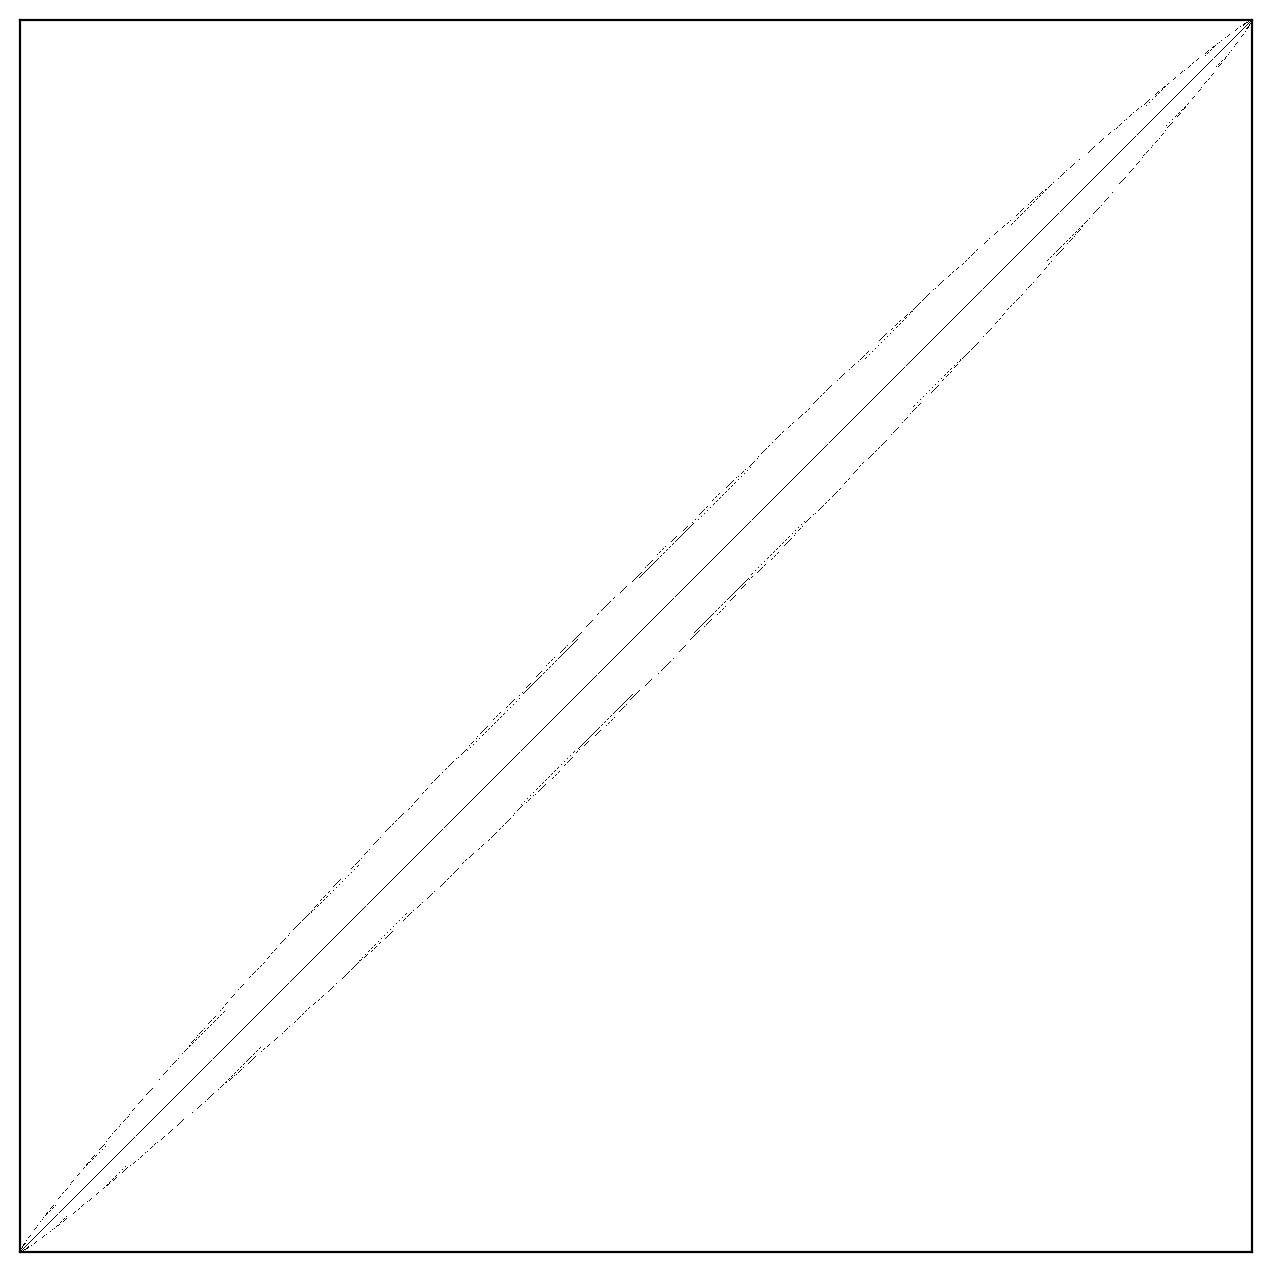

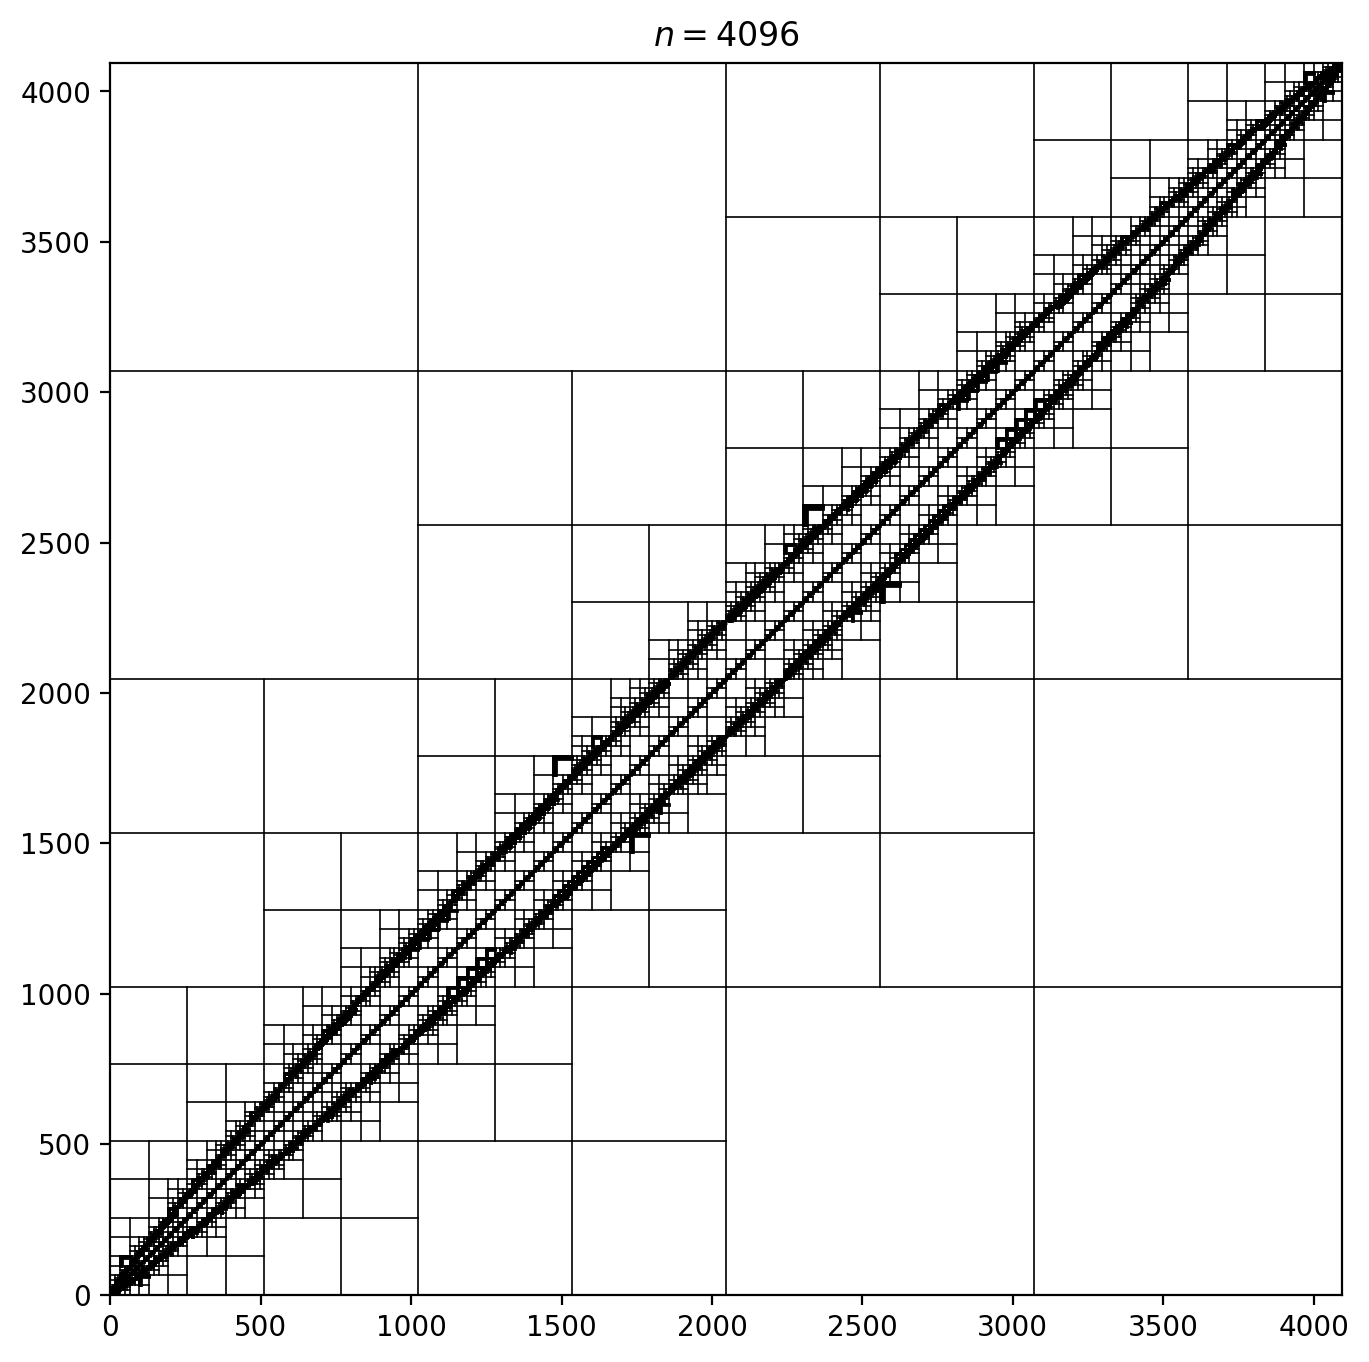

In [6]:
print("CUTHILL-MCKEE")
for i, A in enumerate(As):
    order = CuthillMcKee(Graph(A))
    plt.figure(figsize=(8, 8))
    plt.spy(np.rot90(A[order, :][:, order]))
    plt.xticks([])
    plt.yticks([])
    plt.savefig(f"{i}_ap_sp_cutkee.png")
    DrawTree(CreateTree(A[order, :][:, order], r=1, eps=1e-3)).savefig(f"{i}_ap_hm_cutkee.png")